## Boston House Pricing Prediction

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

In [10]:
boston.data.shape

(506, 13)

In [11]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [108]:
# explore relationship between feature - number of rooms "RM" and target - house price
x=boston.data[:,5]
x=np.array([ [v] for v in x])
y=boston.target

In [109]:
# return the least quare solution for y = x*slope
slope,residuals,rank,sv = np.linalg.lstsq(x,y)
slope,residuals,rank,sv

C:\Users\mibiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(array([3.6533504]), array([29555.78152864]), 1, array([142.24836817]))

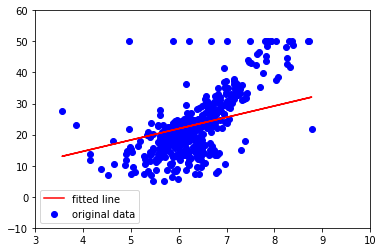

In [110]:
plt.scatter(x, boston.target, color='b', label="original data")
plt.plot(x, slope*x, color='r', label="fitted line")
plt.legend()
plt.xlim(3,10)
plt.ylim(-10,60)
plt.show()

In [111]:
# see how well is the line fitting
rmse=np.sqrt(residuals[0]/len(x))
rmse

array([7.64268509])

In [112]:
# to increase fit, add bias - y = x*slope + bias
x=boston.data[:,5]
x=np.array([ [v,1] for v in x])

In [113]:
(slope,bias),residuals,rank,sv = np.linalg.lstsq(x,y)
(slope,bias),residuals,rank,sv

C:\Users\mibiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


((9.102108981180315, -34.670620776438575),
 array([22061.87919621]),
 2,
 array([143.99484122,   2.46656609]))

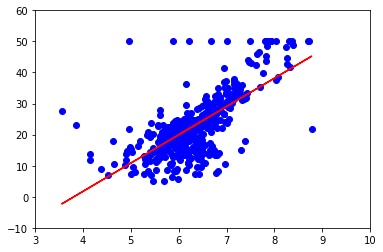

In [93]:
plt.scatter(boston.data[:,5], boston.target, color='b')
plt.plot(x, x*slope+bias, color='r')
plt.xlim(3,10)
plt.ylim(-10,60)
plt.show()

In [118]:
# see how well is the line fitting
rmse=np.sqrt(residuals[0]/len(x))
rmse

6.603071389222561

In [163]:
# use all features in the dataset now
x=boston.data
y=boston.target

In [190]:
# use OLS in sklearn
from sklearn.linear_model import LinearRegression
lm=LinearRegression(fit_intercept=True) # set fit_intercept=True to add bias
lm=lm.fit(x,y)

In [191]:
# get predicted value
p=lm.predict(x)
# get residuals
e=p-y
# get rss
total_error=np.sum(e*e)
total_error

11080.276284149875

In [181]:
# rmse
rmse=np.sqrt(total_error/len(p))
print("RMSE:{}".format(rmse))

RMSE:4.679506300635516


In [205]:
# KFold cross validation
from sklearn.cross_validation import KFold
kf=KFold(len(x), n_folds=10)
total_error=0

for train,test in kf:
    lm=lm.fit(x[train],y[train])
    p=lm.predict(x[test])
    e=p-y[test]
    total_error
    total_error+=np.sum(e*e)

rmse_cv=np.sqrt(total_error/len(x))
print("Cross Validation RMSE:{}".format(rmse_cv))

Cross Validation RMSE:5.881925072430114


In [212]:
# use regularization to decrease cross validation rmse --- use ridge regression
from sklearn.linear_model import Ridge
ls=Ridge()

total_error=0
for train,test in kf:
    lm=ls.fit(x[train],y[train])
    p=lm.predict(x[test])
    e=p-y[test]
    total_error
    total_error+=np.sum(e*e)

rmse_cv=np.sqrt(total_error/len(x))
print("Cross Validation RMSE:{}".format(rmse_cv))

Cross Validation RMSE:5.8277783799775085
